In [1]:
import torch

In [25]:
#%matplotlib inline
import cv2
ss = '{"url": "http://www.sinaimg.cn/dy/slidenews/4_img/2013_24/704_997547_218968.jpg", "image_id": "d8eeddddcc042544a2570d4c452778b912726720", "keypoint_annotations": {"human3": [0, 0, 3, 0, 0, 3, 0, 0, 3, 67, 279, 1, 87, 365, 1, 65, 345, 1, 0, 0, 3, 0, 0, 3, 0, 0, 3, 40, 454, 1, 44, 554, 1, 0, 0, 3, 20, 179, 1, 17, 268, 1], "human2": [444, 259, 1, 474, 375, 2, 451, 459, 1, 577, 231, 1, 632, 396, 1, 589, 510, 1, 490, 538, 1, 0, 0, 3, 0, 0, 3, 581, 535, 2, 0, 0, 3, 0, 0, 3, 455, 78, 1, 486, 205, 1], "human1": [308, 306, 1, 290, 423, 1, 298, 528, 1, 433, 297, 1, 440, 404, 1, 447, 501, 2, 342, 530, 1, 0, 0, 3, 0, 0, 3, 417, 520, 1, 0, 0, 3, 0, 0, 3, 376, 179, 1, 378, 281, 1]}, "human_annotations": {"human3": [0, 169, 114, 633], "human2": [407, 59, 665, 632], "human1": [265, 154, 461, 632]}}';
import json
obj = json.loads(ss)

path = './img/' + obj['image_id'] + '.jpg'

img = cv2.imread(path)

#import matplotlib.pyplot as plt
import matplotlib.image as plimg
img = plimg.imread(path)

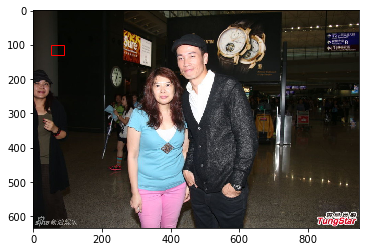

In [24]:
import matplotlib.patches as patches
fig = plt.figure()
ax = fig.add_subplot(111)

rect = patches.Rectangle((50,100), 40, 30,linewidth=1,edgecolor='r',facecolor='none')

ax.imshow(img)
ax.add_patch(rect)


[0, 0, 3, 0, 0, 3, 0, 0, 3, 67, 279, 1, 87, 365, 1, 65, 345, 1, 0, 0, 3, 0, 0, 3, 0, 0, 3, 40, 454, 1, 44, 554, 1, 0, 0, 3, 20, 179, 1, 17, 268, 1]
[444, 259, 1, 474, 375, 2, 451, 459, 1, 577, 231, 1, 632, 396, 1, 589, 510, 1, 490, 538, 1, 0, 0, 3, 0, 0, 3, 581, 535, 2, 0, 0, 3, 0, 0, 3, 455, 78, 1, 486, 205, 1]
[308, 306, 1, 290, 423, 1, 298, 528, 1, 433, 297, 1, 440, 404, 1, 447, 501, 2, 342, 530, 1, 0, 0, 3, 0, 0, 3, 417, 520, 1, 0, 0, 3, 0, 0, 3, 376, 179, 1, 378, 281, 1]


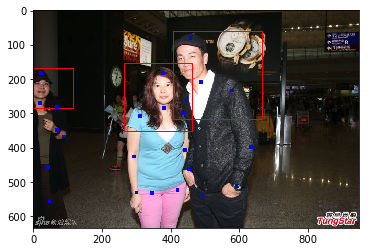

In [45]:
#%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(img)

for key in obj['human_annotations']:
    rc = obj['human_annotations'][key]
    x, y, w, h = rc[0], rc[1], rc[2] - rc[0], rc[3] - rc[1]
    rect = patches.Rectangle((x, y), w, w, linewidth = 1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    
# 人体骨骼关键点共有14个
# 1/右肩，2/右肘，3/右腕，4/左肩，5/左肘，6/左腕，7/右髋，8/右膝，9/右踝，10/左髋，11/左膝，12/左踝，13/头顶，14/脖子
# (x, y, v), v 表示是否可见，v=1可见，v=2 不可见，v=3 不在图内或不可推测
keypoints_map = obj['keypoint_annotations']
for key in keypoints_map:
    keypoints = keypoints_map[key]
    print(keypoints)
    x, y, v = 0, 0, 0
    i = 0
    for i in range(14):
        x, y, v = keypoints[i * 3], keypoints[i * 3 + 1], keypoints[i * 3 + 2]
        if v != 1:
            continue
        rect = patches.Rectangle((x, y), 5, 5, linewidth = 2, edgecolor='b', facecolor='none')
        ax.add_patch(rect)

plt.show()

根据标注的大小进行部位切割

In [44]:
print(img.shape)

(634, 950, 3)


(20, 179, 1) (17, 268, 1)
(455, 78, 1) (486, 205, 1)
(376, 179, 1) (378, 281, 1)


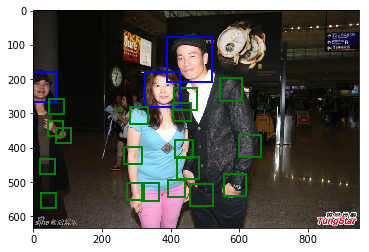

In [59]:
#%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(img)
    
# 人体骨骼关键点共有14个
# 1/右肩，2/右肘，3/右腕，4/左肩，5/左肘，6/左腕，7/右髋，8/右膝，9/右踝，10/左髋，11/左膝，12/左踝，13/头顶，14/脖子
# (x, y, v), v 表示是否可见，v=1可见，v=2 不可见，v=3 不在图内或不可推测
keypoints_map = obj['keypoint_annotations']

def get_pair(keypoints, i):
    return (keypoints[i * 3], keypoints[i * 3 + 1], keypoints[i * 3 + 2])

def distance(x1, y1, x2, y2):
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5

def get_head_box(x_top, x_neck, y_top, y_neck):
    d = distance(x_top, y_top, x_neck, y_neck)
    d = int(d)
    return (int(x_top - d / 2), y_top, d, d)

def get_box(x, y, w):
    w = int(w)
    return (int(x - w / 2), int(y - w / 2), w, w)

for key in keypoints_map:
    keypoints = keypoints_map[key]
    # 头部大小
    
    # 先假定头一定有
    (x_top, y_top, v_top) = get_pair(keypoints, 12)
    (x_neck, y_neck, v_neck) = get_pair(keypoints, 13)
    print((x_top, y_top, v_top), (x_neck, y_neck, v_neck))
    head_box = get_head_box(x_top, x_neck, y_top, y_neck)
    head_size = head_box[2]
    rect = patches.Rectangle((head_box[0], head_box[1]), head_box[2], head_box[3], linewidth = 2, edgecolor='b', facecolor='none')
    ax.add_patch(rect)
    
    # 其他部位我们乘以一个系数
    # 1/右肩，2/右肘，3/右腕，4/左肩，5/左肘，6/左腕，7/右髋，8/右膝，9/右踝，10/左髋，11/左膝，12/左踝，
    beta = [ 0.5, 0.5, 0.5, 0.5, 0.5,     0.5, 0.5, 0.5, 0.5, 0.5,      0.5, 0.5 ]
    for i in range(12):
        (x, y, v) = get_pair(keypoints, i)
        if v != 1:
            continue
        size = head_size * beta[i]
        box = get_box(x, y, size)
        rect = patches.Rectangle((box[0], box[1]), box[2], box[3], linewidth = 2, edgecolor='g', facecolor='none')
        ax.add_patch(rect)
plt.show()